In [1]:
# Importing essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import datetime
import time
import re

# Gathering the Data:

In the cell below, I will gather all three datasets for this project and load them in the notebook using different methods :

1. Loading the Twitter Archive file into a dataframe
2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)
3. By using the tweet IDs in the WeRateDogs Twitter archive, I tried to use the twitter API developer, but i kept getting a non approved Twitter developer account application every 2 days. So, after a lot of attempts, I will use the tweet-json file provided in the Session.

#### 1. The Twitter Archive

In [2]:
# Loading the Twitter Archive file into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Image Predictions

In [3]:
# Downloading the URL Programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# Loading image prediction data into a dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


####  3. Twitter API — JSON File:

As explained before, I tried to use the twitter API developer, but i kept getting a non approved Twitter developer account application every 2 days. So, after a lot of attempts, I will use the tweet-json file provided in the Session.


In [5]:
# Loading the Json Tweet file into a dataframe
json_tweets = pd.read_json('tweet-json.txt', lines=True)

In [6]:
json_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
json_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Assessing the Data:
I will be inspecting the datasets for two elements :
- Data quality issues
- Lack of tidiness

Two types of assessment will be used for each of the three dataframes : 

1. Visual assessment : each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. 

2. Programmatic assessment : pandas' functions and/or methods are used to assess the data.

#### 1. The Twitter Archive

#####  Visual assessment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


A lot of columns here have NaN values (especially the reply & retweet related).

There are also lots of “None” in the “doggo”, “floorfer”, “pupper”, and “puppo” columns

 ##### Programmatic assessment

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

A lot of columns have more null values than non-null values wich make them non useful. 

From the information of the dataset, we find two datatype problems need to be dealt with:

    a. The datatype of the tweet_id column should be String

    b. The datatype of the timestamp column should be Datetime

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Checking for Duplicates
sum(twitter_archive.duplicated())

0

In [12]:
# Checking for total missing values for each feature
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# Let's check what are the values in the “source” column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Main source is iPhone. 
Also, this column is not readable (i.e: we should delete the “<a href=”https:” part in the source descriptions).

In [14]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

10 is the standard rating_denominator. 

There are abnormal values in rating_denominator (150,170...etc).

In [15]:
# Checking if there are any records in the Archive that are retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull()== False])

181

There are 181 retweets. These aren't really valid as they are duplicated tweets and we don't want retweets.

In [16]:
# Sorting by rating_denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
# Sorting by rating_numerator values
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

There are abnormal values in rating_numerator (1776,960...etc).

In [18]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Two main points we can deduct : 

- A lot of the dogs don't have a name or that data got lost and got replaced by the default 'None'. 

- Irrelevant values  like 'a', 'quite', 'the' which indicates maybe an extraction problem from the text. 

#### 2. Image Predictions
#####  Visual assessment 

In [19]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


 ##### Programmatic assessment

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- There is a lot of NA values in all columns 
- The tweet_id column’s datatype should be a string. 

In [21]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Checking for Duplicates
sum(image_prediction.jpg_url.duplicated())

66

There are 66 duplicates in the jpg_url column

In [23]:
# Checking for total missing values for each feature
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [25]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [26]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [27]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

The capitalisation in the predictions p1, p2 & p3 is inconsistent ( uppercase and lowercase mix) 

Many entries are not related  to dogs (banana, pot ... etc)

#### 3. JSON File
#####  Visual assessment 

In [28]:
json_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


 ##### Programmatic assessment

In [29]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [30]:
json_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [31]:
json_tweets.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

## Observations 

The inspection & assessement results of the three datasets : twitter_archive, image_prediction & json_tweets are summarized below.

### Quality issues

#### twitter_archive 

    - The columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id”,
    “retweeted_status_user_id”, and “retweeted_status_timestamp” have lots of NA values.
    
    - The “doggo”, “floofer”, “pupper”, and “puppo” columns have lots of “None” values.
    
    - The datatype of tweet_id should be string not object. 
    
    - The datatype of the timestamp should be datetime not object.
    
    - The “source” column isn't readable (we should delete the “<a href=”https:” part).
    
    - There are abnormal values in rating_denominator (150,170...etc). 
    
    - There are abnormal values in rating_numerator (1776,960...etc).
    
    - There are 181 retweets. 
    
    - There is a lot of irrelevant values ('a', 'quite') in the dog names and lots of dogs names got replaced by the default 'None'. 

                                                                                            
####  image_prediction

    - There is a lot of NA values in all columns.
    
    - The datatype of tweet_id should be a string. 
    
    - The dataset contains duplicate images. 
    
    - The capitalisation in the predictions p1, p2 & p3 is inconsistent (uppercase and lowercase mix).
    
    - Some entries are not related  to dogs (banana, pot ... etc)

####  json_tweets

    - The datatype of tweet_id should be String, not Integer


### Tidyness

####  twitter_archive

    - doggo, floofer, pupper, puppo are  stages of dog. They should be put in one colum

#### image_prediction

    - There are three predictive results with probabilities, only the prediction result with the highest probabilities is the one we need.



# Cleaning the Data:

This section consists of the cleaning portion of the data wrangling process using the programmatic Data Cleaning Process:

Define  -  Code  -  Test

I converted the observations from the assess step into defined problems, translated these definitions to code to fix problems, then tested the three datasets to make sure the operations worked.


### Creating copies of the Dataframes


In [32]:
# Let's prepare a copy of each dataset to apply the changes
clean_twitter_archive = twitter_archive.copy()
clean_image_prediction = image_prediction.copy()
clean_json_tweets = json_tweets.copy()

#### Define
1. Creating a dog_breed column from the image_prediction to use in the analysis
2. Merging the clean versions of twitter_archive, image_prediction, and json_tweets dataframes 
3. Creating one column for the various dog types: doggo, floofer, pupper, puppo 
4. Deleting the retweets
5. Droping duplicates from image_prediction
6. Removing columns no longer needed in the analysis section
7. Changing tweet_id from an integer to a string
8. Changing the timestamp to correct datetime format
9. Correcting dog naming issues
10. Standardizing dog ratings



### 1. Creating a dog_breed column from the image_prediction to use in the analysis1. 

#### Code

In [33]:
def get_dog_breed(row):

    for i in range(1, 4):
        if row[f"p{i}_dog"]:
            return row[f"p{i}"]
    
    return np.nan

clean_image_prediction["dog_breed"] = clean_image_prediction.apply(get_dog_breed, axis=1)
clean_image_prediction.drop(columns=[col for col in clean_image_prediction.columns if col.startswith("p")], inplace=True)

#### Test

In [34]:
clean_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,dog_breed
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,French_bulldog
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,Labrador_retriever
214,670046952931721218,https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg,1,Blenheim_spaniel
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow
1063,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier



### 2. Merging the clean versions of twitter_archive, image_prediction, and json_tweets dataframes
(I will be using this merged dataset to clean data).

#### Code

In [35]:
df_merge = pd.concat([clean_twitter_archive, clean_image_prediction, clean_json_tweets], join='outer', axis=1)

In [36]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Test

In [37]:
df_merge.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'created_at', 'id',
       'id_str', 'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [38]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   in_reply_to_status_id          78 non-null     float64            
 2   in_reply_to_user_id            78 non-null     float64            
 3   timestamp                      2356 non-null   object             
 4   source                         2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    float64            
 7   retweeted_status_user_id       181 non-null    float64            
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

In [39]:
df_merge.replace('None', np.nan, inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   in_reply_to_status_id          78 non-null     float64            
 2   in_reply_to_user_id            78 non-null     float64            
 3   timestamp                      2356 non-null   object             
 4   source                         2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    float64            
 7   retweeted_status_user_id       181 non-null    float64            
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

### 3. Creating one column for the various dog types: doggo, floofer, pupper, puppo

#### Code

In [40]:
# Extract the text from the columns into the new dog_type colunn
df_merge['dog_type'] = df_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [41]:
df_merge[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
1838,pupper,NaN,NaN,pupper,NaN
1758,NaN,NaN,NaN,NaN,NaN
14,puppo,NaN,NaN,NaN,puppo
1933,NaN,NaN,NaN,NaN,NaN
970,NaN,NaN,NaN,NaN,NaN


#### Test

In [42]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [43]:
df_merge.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'created_at', 'id',
       'id_str', 'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'dog_type'],
      dtype='object')

In [44]:
df_merge.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

### 4. Deleting the retweets

#### Code

In [45]:
df_merge = df_merge[np.isnan(df_merge.retweeted_status_id)]

In [46]:
# Verify no non-null entries are left
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   int64              
 1   in_reply_to_status_id          78 non-null     float64            
 2   in_reply_to_user_id            78 non-null     float64            
 3   timestamp                      2175 non-null   object             
 4   source                         2175 non-null   object             
 5   text                           2175 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  2117 non-null   object             
 10  rating_numerator        

In [47]:
# Remove the following columns:

df_merge.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [48]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   int64              
 1   timestamp                      2175 non-null   object             
 2   source                         2175 non-null   object             
 3   text                           2175 non-null   object             
 4   expanded_urls                  2117 non-null   object             
 5   rating_numerator               2175 non-null   int64              
 6   rating_denominator             2175 non-null   int64              
 7   name                           1495 non-null   object             
 8   doggo                          87 non-null     object             
 9   floofer                        10 non-null     object             
 10  pupper                  

### 5. Droping the duplicate values from the jpg_url column

#### Code

In [49]:
df_merge = df_merge.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [50]:
sum(df_merge['jpg_url'].duplicated())

0

### 6. Removing columns no longer needed in the analysis section

#### Code

In [51]:
df_merge.drop(['expanded_urls','contributors', 'coordinates', 'geo', 'place','quoted_status_id', 'quoted_status_id_str',
       'quoted_status','in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name','created_at'], axis=1, inplace=True)

#### Test

In [52]:
df_merge.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'id', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'dog_type'],
      dtype='object')

### 7. Changing tweet_id datatype from an integer to a string

#### Code

In [53]:
df_merge['tweet_id'] = df_merge['tweet_id'].astype(str)

#### Test

In [54]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 0 to 2075
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1835 non-null   object 
 1   timestamp                      1835 non-null   object 
 2   source                         1835 non-null   object 
 3   text                           1835 non-null   object 
 4   rating_numerator               1835 non-null   int64  
 5   rating_denominator             1835 non-null   int64  
 6   name                           1269 non-null   object 
 7   doggo                          87 non-null     object 
 8   floofer                        10 non-null     object 
 9   pupper                         217 non-null    object 
 10  puppo                          25 non-null     object 
 11  tweet_id                       1835 non-null   object 
 12  jpg_url                        1834 non-null   o

### 8. Changing the timestamp to correct datetime format

#### Code

In [55]:
# Remove the time zone from the 'timestamp' column
df_merge['timestamp'] = df_merge['timestamp'].str.slice(start=0, stop=-6)

In [56]:
# Change the 'timestamp' column to a datetime object
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Test

In [57]:
df_merge.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,...,False,8853.0,39467.0,False,False,0.0,0.0,en,NaN,NaN


### 9. Correcting dog naming issues

#### Code

In [58]:
# Replacing the incorrect dog names
df_merge.name = df_merge.name.str.replace('^[a-z]+', 'None')

/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [59]:
# replacing the 'None's in the name column by NaN values
df_merge.name = df_merge.name.replace('None', np.nan)

In [60]:
df_merge['name'].value_counts()

Charlie     11
Oliver      10
Lucy        10
Cooper       9
Tucker       8
            ..
Timmy        1
Combo        1
Hercules     1
Jay          1
Holly        1
Name: name, Length: 807, dtype: int64

In [61]:
df_merge['name'].sample(10)

624         NaN
2039     Marley
1722       Ozzy
20       Gerald
1829    Winston
1175    Neptune
1236       Kane
807         NaN
1609        NaN
1223     Thumas
Name: name, dtype: object

### 10. Standardizing dog ratings

#### Code

In [62]:
df_merge['rating_numerator'] = df_merge['rating_numerator'].astype(float)

In [63]:
df_merge['rating_denominator'] = df_merge['rating_denominator'].astype(float)

In [64]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 0 to 2075
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       1835 non-null   object        
 1   timestamp                      1835 non-null   datetime64[ns]
 2   source                         1835 non-null   object        
 3   text                           1835 non-null   object        
 4   rating_numerator               1835 non-null   float64       
 5   rating_denominator             1835 non-null   float64       
 6   name                           1203 non-null   object        
 7   doggo                          87 non-null     object        
 8   floofer                        10 non-null     object        
 9   pupper                         217 non-null    object        
 10  puppo                          25 non-null     object        
 11  tweet_id         

In [65]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in df_merge['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"]

In [66]:
# Print the indices of the ratings above (have decimal)
ratings_decimals_index

[45, 695, 763, 1689]

In [67]:
#Correctly converting the above decimal ratings to float
df_merge.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
df_merge.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
df_merge.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
df_merge.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

In [68]:
# Testing the indices 
df_merge.loc[40]

tweet_id                                                        884562892145688576
timestamp                                                      2017-07-11 00:00:02
source                           <a href="http://twitter.com/download/iphone" r...
text                             This is Kevin. He's just so happy. 13/10 what ...
rating_numerator                                                              13.0
rating_denominator                                                            10.0
name                                                                         Kevin
doggo                                                                          NaN
floofer                                                                        NaN
pupper                                                                         NaN
puppo                                                                          NaN
tweet_id                                                     6.666914187071324e+17
jpg_

In [69]:
# Create a new column called rating, and calulate the value with new, standardized ratings
df_merge['rating'] = df_merge['rating_numerator'] / df_merge['rating_denominator']

In [70]:
df_merge.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,dog_type,rating
169,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12.0,10.0,NaN,NaN,NaN,NaN,...,14740.0,35553.0,False,False,0.0,0.0,en,NaN,NaN,1.2
1733,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,10.0,10.0,Rinna,NaN,NaN,pupper,...,937.0,2367.0,False,False,0.0,0.0,en,NaN,pupper,1.0
1428,697616773278015490,2016-02-11 03:02:54,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,11.0,10.0,NaN,NaN,NaN,pupper,...,572.0,2250.0,False,False,0.0,0.0,en,NaN,pupper,1.1
1277,709042156699303936,2016-03-13 15:43:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,9.0,10.0,Klevin,NaN,NaN,NaN,...,1015.0,3226.0,False,False,0.0,0.0,en,NaN,NaN,0.9
825,769695466921623552,2016-08-28 00:37:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,13.0,10.0,Titan,NaN,NaN,NaN,...,1969.0,5980.0,False,False,0.0,0.0,en,NaN,NaN,1.3
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,NaN,NaN,NaN,...,1904.0,6721.0,False,False,0.0,0.0,en,NaN,NaN,177.6
38,884925521741709313,2017-07-12 00:01:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,12.0,10.0,Earl,NaN,NaN,NaN,...,6096.0,28514.0,False,False,0.0,0.0,en,NaN,NaN,1.2
757,778624900596654080,2016-09-21 16:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,11.0,10.0,Penny,NaN,NaN,NaN,...,5023.0,15135.0,False,False,0.0,0.0,en,NaN,NaN,1.1
1183,718939241951195136,2016-04-09 23:10:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,12.0,10.0,Otis,NaN,NaN,NaN,...,542.0,2669.0,False,False,0.0,0.0,en,NaN,NaN,1.2
1457,695095422348574720,2016-02-04 04:03:57,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,12.0,10.0,NaN,NaN,NaN,pupper,...,685.0,1771.0,False,False,0.0,0.0,en,NaN,pupper,1.2


In [71]:
df_merge.loc[30]

tweet_id                                                        886267009285017600
timestamp                                                      2017-07-15 16:51:35
source                           <a href="http://twitter.com/download/iphone" r...
text                             @NonWhiteHat @MayhewMayhem omg hello tanner yo...
rating_numerator                                                              12.0
rating_denominator                                                            10.0
name                                                                           NaN
doggo                                                                          NaN
floofer                                                                        NaN
pupper                                                                         NaN
puppo                                                                          NaN
tweet_id                                                     6.664187895133266e+17
jpg_

#### Test

In [72]:
df_merge.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

# Storing, Analyzing, and Visualizing Data

This section provides an analysis of the data set, and corresponding visualizations to draw valuable insights. I will try to derive insights for the following elements : 

1. Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.
2. Visualizing the retweet counts, and favorite counts comparison over time.
3. Visualizing the most popular dog breed
4. Visualizing the most popular dog names

In [73]:
# Storing the new twitter_archive to a new csv file
df_merge.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### 1. Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [74]:
df_merge.timestamp = pd.to_datetime(df_merge['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
monthly_tweets = df_merge.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum();

/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


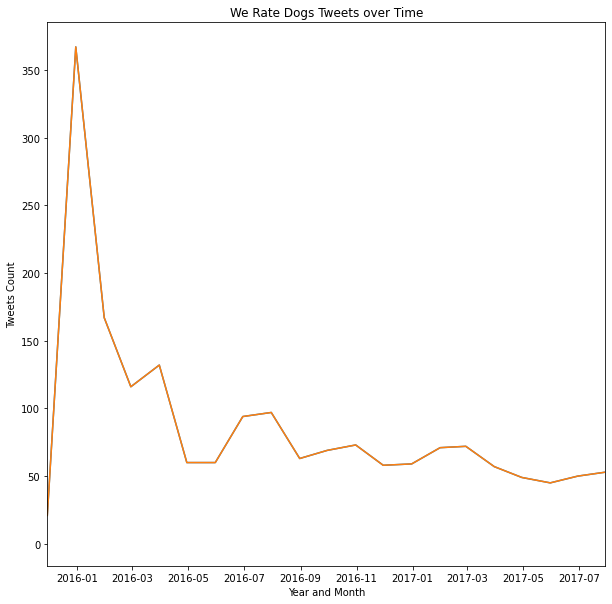

In [75]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over the time tweets decreased significantly. 

Spikes in activity were registered during the January of 2016, and started decreasing a lot from there except a second spike during March 2016.


### 2. Visualizing the correlation between retweet counts and favorite counts 

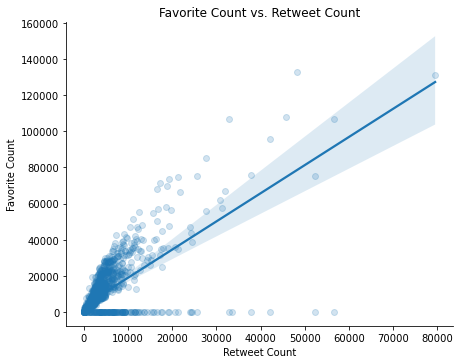

In [76]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_merge,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

Favorite counts are correlated with retweet counts - this is a positive correlation. That means every increase in retweets leads to an increase in likes.

### 3. Visualizing the most popular dog breed

In [77]:
df_merge['dog_breed'].value_counts()

golden_retriever        150
Labrador_retriever       97
Chihuahua                85
Pembroke                 84
pug                      61
                       ... 
groenendael               1
Scotch_terrier            1
Irish_wolfhound           1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 112, dtype: int64

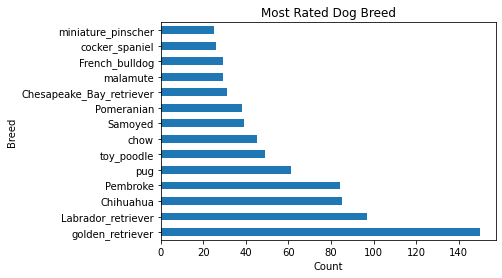

In [78]:
# Histogram to visualize dog breeds
dog_breed = df_merge.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed');

The most common breed is the Golden Retriever which seems obvious since they’re everyone’s favorite smart & loyal family breed (including me). Followed by the Labrador retriever & Chihuahua.

### 4. Visualizing the most popular dog names

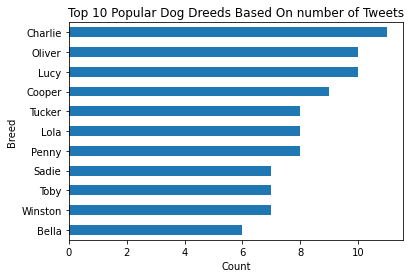

In [79]:
df_merge.name.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number of Tweets')
plt.xlabel('Count')
plt.ylabel('Breed');

The Top 3 Dog Breeds based on number of tweets are : Charlie, Oliver & Lucy.